In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('../dataset/dataset_preprocessed_numeric.csv', header=0, low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809711 entries, 0 to 809710
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   COMISARIA                 809711 non-null  int64
 1   DERIVADA_FISCALIA         809711 non-null  int64
 2   DIRECCION                 809711 non-null  int64
 3   DIST_CIA                  809711 non-null  int64
 4   DIST_HECHO                809711 non-null  int64
 5   DPTO_CIA                  809711 non-null  int64
 6   DPTO_HECHO                809711 non-null  int64
 7   EDAD                      809711 non-null  int64
 8   EST_CIVIL                 809711 non-null  int64
 9   LIBRO                     809711 non-null  int64
 10  MODALIDAD                 809711 non-null  int64
 11  PROV_CIA                  809711 non-null  int64
 12  PROV_HECHO                809711 non-null  int64
 13  REGION                    809711 non-null  int64
 14  SEXO                

In [4]:
x = dataset.drop('MODALIDAD', axis=1).values
y = dataset['MODALIDAD'].values

In [5]:
print(x)
print(y)

[[ 412    4  305 ...    1    1    4]
 [1096    9  963 ...    1    1    4]
 [1096    9  963 ...    1    1    4]
 ...
 [ 993    4  715 ...   11   25    0]
 [ 993    4  715 ...   12   22    6]
 [ 993    4  715 ...   12   27    4]]
[2 2 2 ... 4 4 4]


### PCA

#### Matriz de covarianza

In [6]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [7]:
std = StandardScaler()
x_std = std.fit_transform(x)

In [8]:
pca = convers_pca(no_of_components=2)
pca.fit(x_std)

In [9]:
pca.eigen_vectors

array([[ 1.26941656e-01, -5.31631961e-02,  2.83882865e-03,
         2.29896034e-01,  2.22769549e-01,  4.21648778e-01,
         4.21027740e-01, -1.21821071e-02,  2.75786242e-02,
         3.18584286e-02,  4.05547151e-01,  4.03545452e-01,
         3.47412833e-01,  2.07660599e-02, -3.79228546e-03,
         1.78217409e-02, -1.51831894e-01,  5.61011208e-02,
        -2.90634905e-02,  1.30545140e-02,  8.32869067e-03,
         1.50445696e-01,  2.02653799e-02,  8.78581552e-04,
         6.66091774e-04,  1.49019619e-01,  1.67712657e-02,
        -6.54840942e-04,  1.24910976e-03],
       [-9.14233518e-02, -8.97844477e-02,  2.09991302e-03,
        -1.50640624e-01, -1.54737389e-01, -1.29478978e-01,
        -1.27139993e-01,  3.21431218e-02,  4.48346774e-02,
        -8.38136222e-02, -1.46895668e-01, -1.46485311e-01,
         2.21668981e-01,  7.61658199e-02, -4.97990274e-02,
         4.05688566e-02, -4.82278703e-01, -1.05432161e-01,
        -1.44335707e-02, -3.69700508e-02,  3.27982908e-02,
         5.17

In [10]:
pca.eigen_values

array([3.8575953 , 2.84777664, 2.03216385, 1.8242723 , 1.69775651,
       1.55706388, 0.12861989, 0.00514664, 0.01543796, 0.01052292,
       0.04402788, 0.24390283, 0.30376244, 1.38560696, 0.44630295,
       0.49839296, 1.29135063, 0.61796126, 0.69937725, 0.78287732,
       0.83363949, 1.05502694, 0.90225395, 0.92600042, 1.03003923,
       1.0200981 , 0.96870687, 0.97823838, 0.99611408])

In [11]:
pca.sorted_components

array([ 0,  1,  2,  3,  4,  5, 13, 16, 21, 24, 25, 28, 27, 26, 23, 22, 20,
       19, 18, 17, 15, 14, 12, 11,  6, 10,  8,  9,  7], dtype=int64)

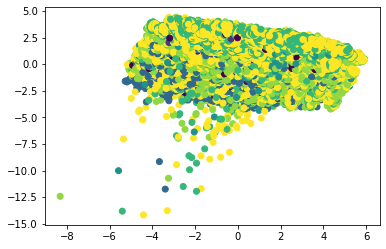

In [12]:
import matplotlib.pyplot as plt
transformed = pca.transform(x_std)
plt.figure()
plt.scatter(transformed[:, 0], transformed[:, 1], c=y)

#### Usando el módulo PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
m_pca = PCA(n_components=2)
m_pca.fit(x_std)
transformed = m_pca.transform(x_std)

In [15]:
print(x_std.shape)
print(transformed.shape)

(809711, 29)
(809711, 2)


Text(0, 0.5, 'PCA 2')

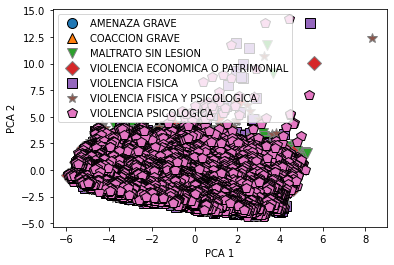

In [16]:
import mglearn
mglearn.discrete_scatter(transformed[:, 0], transformed[:, 1], y)
plt.legend(['AMENAZA GRAVE', 'COACCION GRAVE', 'MALTRATO SIN LESION',
       'VIOLENCIA ECONOMICA O PATRIMONIAL', 'VIOLENCIA FISICA',
       'VIOLENCIA FISICA Y PSICOLOGICA', 'VIOLENCIA PSICOLOGICA'], loc='best')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")